## Gráficos del informe final

Links de interés a la hora de hacer gráficos:  
Letras griegas y Latex  
https://matplotlib.org/stable/tutorials/text/mathtext.html  
Colores  
https://matplotlib.org/stable/gallery/color/named_colors.html  
Legend's location  
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot  


In [376]:
#Importo librerías
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib
import math
pi = math.pi


In [377]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

### Testeo
Hago un test graficando todos los resultados de una ejecución

In [378]:
#Importo datos
# datos_velocidad = genfromtxt('datos/velocentral.txt', delimiter=' ')
# datos_evolucion = genfromtxt('datos/evolucion.txt', delimiter=' ')

In [379]:
# #Conservación de masa

# plt.plot(datos_evolucion[:,0], datos_evolucion[:,1], label='Masa(t)')
# #Parámetros del gráfico:
# # plt.legend(loc='lower right')
# plt.xlabel('t')
# plt.ylabel('m');
# # plt.xticks(x, my_xticks)
# # plt.yticks(np.arange(y.min(), y.max(), 0.005))
# # plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))



# # #Guardo el gráfico
# # plt.savefig('sol_aprox.pdf', format='pdf',bbox_inches = "tight")


In [380]:
# #dUdt y dVdt

# #Grafico

# #Conservación de masa
# plt.plot(datos_evolucion[:,0], datos_evolucion[:,2], label='dU/dt')
# plt.plot(datos_evolucion[:,0], datos_evolucion[:,3], label='dV/dt')
# #Parámetros del gráfico:
# plt.legend(loc='lower right')
# plt.xlabel('t')
# plt.ylabel('dVel/dt');
# # plt.xticks(x, my_xticks)
# # plt.yticks(np.arange(y.min(), y.max(), 0.005))
# # plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

In [381]:
# #Velocidad central

# #Grafico


# plt.plot(datos_velocidad[:,0], datos_velocidad[:,1], label='$U_{central}$')
# plt.plot(datos_velocidad[:,0], datos_velocidad[:,2], label='$V_{central}$')
# #Parámetros del gráfico:
# plt.legend(loc='lower right')
# plt.xlabel('x/y')
# plt.ylabel('$Velocidad_{central}$');
# # plt.xticks(x, my_xticks)
# # plt.yticks(np.arange(y.min(), y.max(), 0.005))
# # plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

In [382]:
# #Velocidad central adimensionalizada y graficada sobre el recinto

# #Grafico

# amplitud = 0.3
# plt.plot(amplitud*datos_velocidad[:,1] + 0.5, datos_velocidad[:,0], label='$U_{central}$')
# plt.plot(datos_velocidad[:,0], amplitud*datos_velocidad[:,2] + 0.5, label='$V_{central}$')
# #Parámetros del gráfico:
# plt.legend(loc='lower right')
# plt.xlabel('t')
# plt.ylabel('$Velocidad_{central}$');
# # plt.xticks(x, my_xticks)
# # plt.yticks(np.arange(y.min(), y.max(), 0.005))
# # plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

In [383]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

### Inciso a

Grafico u y v en el centro en función de deltat para ver si cambia con deltat

In [384]:
#Importo datos
datos = genfromtxt('datos/a_velcentral.csv', delimiter=' ')


In [385]:
dt_array = datos[:,0]
Ucentro_array = datos[:,1]
Vcentro_array = datos[:,2]

In [386]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

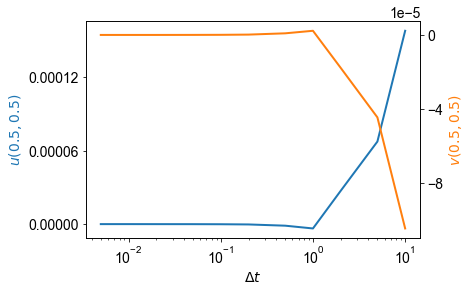

In [387]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()



ax1.plot(dt_array,  Ucentro_array[0] - Ucentro_array, color = "tab:blue", linewidth=2)

ax2.plot(dt_array, Vcentro_array[0] - Vcentro_array, color = "tab:orange", linewidth=2)


ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')


# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
ax1.set_xlabel('$\Delta t$')
ax1.set_ylabel('$u(0.5,0.5)$', color = "tab:blue")
ax2.set_ylabel('$v(0.5,0.5)$', color = "tab:orange")

# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
# ax1.set_yscale("log")
# ax2.set_yscale("log")

#Elijo el nro de ticks en los ejes verticales
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))

#
ax1.yaxis.set_major_formatter(FixedOrderFormatter(-6))
ax2.yaxis.set_major_formatter(FixedOrderFormatter(-6))

#Guardo el gráfico
plt.savefig('a_vel_vs_dt.pdf', format='pdf',bbox_inches = "tight")

In [388]:
#Calculo para cada velocidad la desviación estándar dividida el promedio para darme una idea de la variabilidad del resultado en función de dt
print("Velocidad u: ", np.std(Ucentro_array)/np.mean(Ucentro_array))
print("Velocidad v: ", np.std(Vcentro_array)/np.mean(Vcentro_array))

Velocidad u:  -0.0010384435060400614
Velocidad v:  0.0007683476577239294


### Inciso b
Grafico para DC2 los errores respecto a los resultados de Guia

In [389]:
#Resultados de Guia: (copiados directamente del paper)
#orden: Re: [100, 1000, 5000]
guia_ucentral = np.array([-0.20581, -0.06080, -0.03039])
guia_vcentral = np.array([0.05454, 0.02526, 0.00945])

In [390]:
#Cargo datos y creo la matriz de velocidades centrales donde las filas son n1 y las columnas, Re


def velocidades_centrales(inciso, termino_advectivo):

    Re_array = np.array([100, 1000, 5000])
    n1_array = np.array([20,40,80])

    #Creo la matriz donde guardaré los datos
    datos_u = np.zeros((len(n1_array), len(Re_array)))
    datos_v = np.zeros((len(n1_array), len(Re_array)))

    for i in range(len(n1_array)):
        for j in range(len(Re_array)):

            n1 = n1_array[i]
            Re = Re_array[j]

            #Abro el archivo de velocidades
            archivo_path = 'datos/'+inciso+ '_'+termino_advectivo+ '_'+str(n1)+ '_'+str(Re)+ '_velocentral.csv'
            datos = genfromtxt(archivo_path, delimiter=' ')
            posicion_centro_izq = int((len(datos[:,0]))/2 - 1)
            posicion_centro_der = int((len(datos[:,0]))/2)
            # print(datos[posicion_centro_izq,0], datos[posicion_centro_der,0])
            datos_u[i,j] = (datos[posicion_centro_izq, 1] + datos[posicion_centro_der, 1])/2
            datos_v[i,j] = (datos[posicion_centro_izq, 2] + datos[posicion_centro_der, 2])/2

    return datos_u, datos_v


inciso = 'b'
termino_advectivo = 'D'

datos_u_DC2, datos_v_DC2 = velocidades_centrales(inciso, termino_advectivo)

# datos_u_DC2 = genfromtxt('datos/b_ucentral - copia.csv', delimiter=',')
# datos_v_DC2 = genfromtxt('datos/b_vcentral - copia.csv', delimiter=',')

In [391]:
def errores_advectivo(datos_u, datos_v, guia_ucentral,guia_vcentral):
    #Calcula los errores considerando que se cambió el esquema del término advectivo
    #datos_u: datos de la velocidad u central
    #datos_v: datos de la velocidad v central
    #guia_ucentral: datos de la velocidad u central de Guia
    #guia_vcentral: datos de la velocidad v central de Guia

    #Creo la matriz de errores que calcula cuadráticamente los errores para cada valor de n1 y Re
    errores = np.zeros(datos_u.shape)
    for i in range(datos_u.shape[0]):
        for j in range(datos_u.shape[1]):
            modulo = guia_ucentral[j]**2 + guia_vcentral[j]**2
            errores[i,j] = np.sqrt((datos_u[i,j] - guia_ucentral[j])**2 + (datos_v[i,j] - guia_vcentral[j])**2)/modulo
            
    return errores

In [392]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

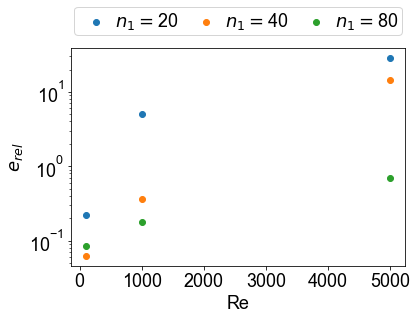

In [393]:
#Calculo los errores
errores_DC2 = errores_advectivo(datos_u_DC2, datos_v_DC2, guia_ucentral,guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores_DC2[i,:], label='$n_1 = $' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2), handletextpad=0.1, borderpad = 0.2, columnspacing=0.5)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('termino_adv_DC2.pdf', format='pdf',bbox_inches = "tight")

In [394]:
print(errores_DC2)

[[ 0.21997137  5.00456094 28.34460351]
 [ 0.06229445  0.36211778 14.6604036 ]
 [ 0.08541083  0.17567308  0.69044851]]


#### Gráfico de velocidades

Quizás sea más formal graficar la velocidad u y v en todo el eje, de modo de tener una visión en más puntos que tan solo en 0.5



In [395]:
#Vectores de Guia:

guia_posicion_u_central = np.array([0, 0.0547, 0.0625, 0.0703, 0.1016, 0.1719, 0.2813, 0.4531, 0.5, 0.6172, 0.7344, 0.8516, 0.9531, 0.9609, 0.9688, 0.9766, 1.])

guia_posicion_v_central = np.array([0, 0.0625, 0.0703, 0.0781,0.0938, 0.1563, 0.2266, 0.2344,0.5, 0.8047, 0.8594, 0.9063, 0.9453, 0.9531, 0.9609, 0.9688, 1.])

guia_ucentral_100 = np.array([0., -0.03717, -0.04192, -0.04775, -0.06434, -0.10150, -0.15662, -0.21090, -0.20581, -0.13641, 0.00332, 0.23151, 0.68717, 0.73722, 0.78871, 0.84123, 1.])

guia_vcentral_100 = np.array([0., 0.09233, 0.10091, 0.10890, 0.12317, 0.16077, 0.17507, 0.17527, 0.05454, -0.24533, -0.22445, -0.16914, -0.10313, -0.08864, -0.07391, -0.05906, 0.0])
guia_ucentral_1000 = np.array([0., -0.18109, -0.20196, -0.22220, -0.29730, -0.38289, -0.27805, -0.10648, -0.06080, 0.05702, 0.18719, 0.33304, 0.46604, 0.51117, 0.57492, 0.65928, 1.])
guia_vcentral_1000 = np.array([0., 0.27485, 0.29012, 0.30353, 0.32627, 0.37092, 0.33075, 0.32235, 0.02526, -0.31966, -0.42665, -0.51550, -0.39188, -0.33714, -0.27669, -0.21388, 0.0])
guia_ucentral_5000 = np.array([0., -0.41165, -0.42901, -0.43643, -0.40435, -0.33050, -0.22855, -0.07404, -0.03039, 0.08183, 0.20087, 0.33556, 0.46036, 0.45992, 0.46120, 0.48223, 1.])
guia_vcentral_5000 = np.array([0., 0.42447, 0.43329, 0.43648, 0.42951, 0.35368, 0.28066, 0.27280, 0.00945, -0.30018, -0.36214, -0.41442, -0.52876, -0.55408, -0.55069, -0.49774, 0.])

#Con ellos creo un diccionario
guia_dicc_u = {100:[guia_posicion_u_central, guia_ucentral_100], 1000:[guia_posicion_u_central, guia_ucentral_1000], 5000 :[guia_posicion_u_central, guia_ucentral_5000] }
guia_dicc_v = {100:[guia_posicion_v_central, guia_vcentral_100], 1000:[guia_posicion_v_central, guia_vcentral_1000], 5000 :[guia_posicion_v_central, guia_vcentral_5000] }

guia_dicc = {'u':guia_dicc_u, 'v':guia_dicc_v}

In [396]:
# def diferencia_Guia(datos, Re)
#     #Calculo el vector de diferencias respecto a Guia
# return

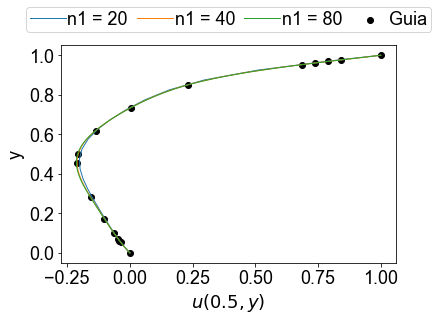

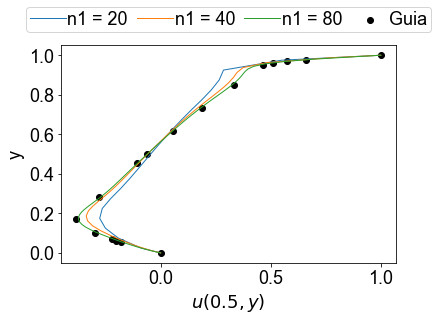

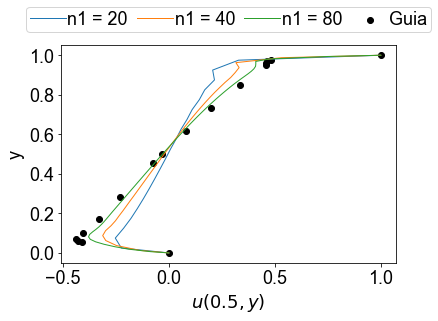

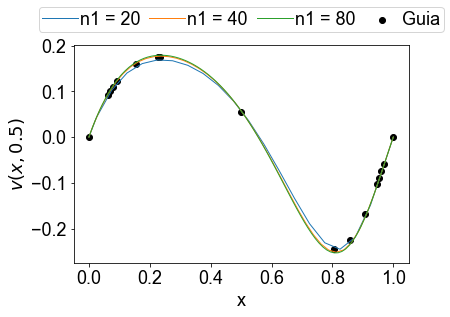

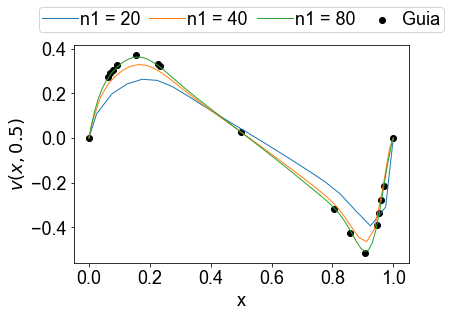

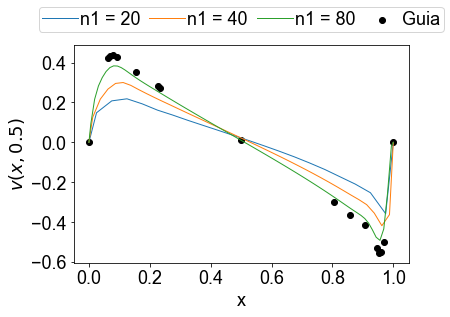

In [397]:
inciso = 'b'
termino_advectivo = 'D'

n1_array = np.array([20,40,80])
Re_array = np.array([100,1000,5000])
vel_array = np.array(['u', 'v']) #1: u, 2: v


#Grafico ambas velocidades:
for k in range(len(vel_array)):

    #Grafico para todo Re:
    for Re in Re_array:
        #Grafico para todo n1
        for n1 in n1_array:
            #Cargo datos
            archivo_path = 'datos/'+inciso+ '_'+termino_advectivo+ '_'+str(n1)+ '_'+str(Re)+ '_velocentral.csv'
            datos = genfromtxt(archivo_path, delimiter=' ')

            #Agrego las condiciones de borde que no forman parte de los datos guardados
            if vel_array[k] == 'u':
                var_x = datos[:,k+1]
                var_y = datos[:,0]
                guia_x = guia_dicc[vel_array[k]][Re][1]
                guia_y = guia_dicc[vel_array[k]][Re][0]


                var_x = np.append([0.0],var_x)
                var_x = np.append(var_x, [1.0])

                var_y = np.append([0.0],var_y)
                var_y = np.append(var_y, [1.0])
                
            else:
                var_x = datos[:,0]
                var_y = datos[:,k+1]

                guia_x = guia_dicc[vel_array[k]][Re][0]
                guia_y = guia_dicc[vel_array[k]][Re][1]
                
                
                var_x = np.append([0.0],var_x)
                var_x = np.append(var_x, [1.0])

                var_y = np.append([0.0],var_y)
                var_y = np.append(var_y, [0.0])

            label_ = 'n1 = ' + str(n1)
            plt.plot(var_x, var_y, label =  label_, linewidth = 1)

        plt.scatter(guia_x,guia_y, label = 'Guia', linewidth = 1, color = 'black')

        plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2), handletextpad=0.1, borderpad = 0.2, columnspacing=0.5)
        #plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)

        if vel_array[k] == 'u':
            plt.xlabel('$u(0.5,y)$')
            plt.ylabel('y')
        else:
            plt.ylabel('$v(x,0.5)$')
            plt.xlabel('x')

        #Guardo la figura
        plt.savefig('termino_adv_' + str(termino_advectivo)+inciso+'_'+vel_array[k]+'_'+str(Re)+'.pdf', format='pdf',bbox_inches = "tight")
        plt.show()

In [398]:
np.append([0.0],[1.,0.])

array([0., 1., 0.])

### Inciso c
Es hacer lo mismo que el b pero con otros datos (que se produjeron usando como término advectivo UP1 y QUICK)

In [399]:
#Cargo datos
# datos_u_UP1 = genfromtxt('datos/c_ucentral_U.csv', delimiter=',')
# datos_v_UP1 = genfromtxt('datos/c_vcentral_U.csv', delimiter=',')
# datos_u_QUICK = genfromtxt('datos/c_ucentral_Q.csv', delimiter=',')
# datos_v_QUICK = genfromtxt('datos/c_vcentral_Q.csv', delimiter=',')

inciso = 'c'
termino_advectivo = 'U'
datos_u_UP1, datos_v_UP1 = velocidades_centrales(inciso, termino_advectivo)

inciso = 'c'
termino_advectivo = 'Q'
datos_u_QUICK, datos_v_QUICK = velocidades_centrales(inciso, termino_advectivo)


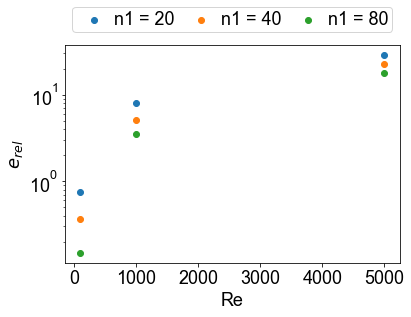

In [400]:
#Calculo los errores
errores_UP1 = errores_advectivo(datos_u_UP1, datos_v_UP1, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores_UP1[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2), handletextpad=0.1, borderpad = 0.2, columnspacing=0.5)
#plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('termino_adv_UP1.pdf', format='pdf',bbox_inches = "tight")

In [401]:
print(errores_UP1)

[[ 0.74001533  8.02960321 28.52477001]
 [ 0.36240934  5.0290478  22.59645113]
 [ 0.14812668  3.46833244 17.6402048 ]]


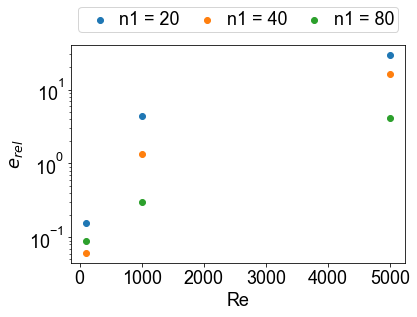

In [402]:
#Calculo los errores
errores_QUICK = errores_advectivo(datos_u_QUICK, datos_v_QUICK, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])

for i in range(3):
    plt.scatter(Re_array, errores_QUICK[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2), handletextpad=0.1, borderpad = 0.2, columnspacing=0.5)
#plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('termino_adv_QUICK.pdf', format='pdf',bbox_inches = "tight")

In [403]:
print(errores_QUICK)

[[ 0.15550188  4.45764823 29.3088486 ]
 [ 0.06112751  1.32251115 16.39422897]
 [ 0.08777714  0.30265944  4.09138815]]


In [404]:
#Comparo para cada Re el error de UP1, QUICK y DC2 con distintos n1
#Esta comparación voy a hacerla directamente con una tabla. Si no, estoy representando el mismo contenido de una tabla en un gráfico.



# i = 0 #Nro de Re
# #Grafico errores_DC2 vs n1 para Re
# errores_metodos_n1 = np.array([errores_DC2[i,:], errores_UP1[i,:], errores_QUICK[i,:]])

# for j in range(3):
#     plt.subplot(1,3,j+1)
#     for k in range(3):
#         plt.ylabel('$e$')
#         plt.scatter(n1_array[j], errores_metodos_n1[k,j]);
#         plt.xlabel('n1')




# # plt.subplot(1,3,2)
# # plt.scatter(n1_array, errores_UP1[i,:], label='UP1, Re = ' + str(Re_array[i]));
# # plt.subplot(1,3,3)
# # plt.scatter(n1_array, errores_QUICK[i,:], label='QUICK, Re = ' + str(Re_array[i]));

# #Parámetros del gráfico:
# # plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)


# plt.ylabel('$e$')
# # plt.xticks(x, my_xticks)
# # plt.yticks(np.arange(y.min(), y.max(), 0.005))
# # plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# # plt.xlim(10.0**-4, 10.0**0)
# # plt.xscale("log")
# # plt.yscale("log")

# #Guardo el gráfico
# plt.savefig('c_error_QUICK_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

#### Comparación entre terminos advectivos

Para cada Re grafico las velocidades de los 3 métodos numéricos

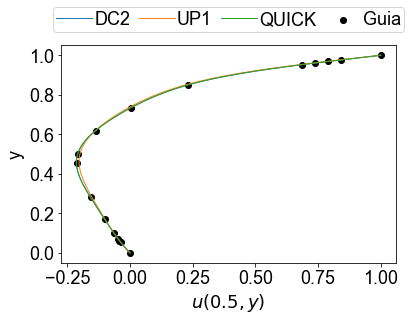

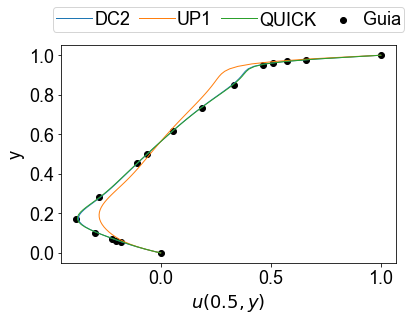

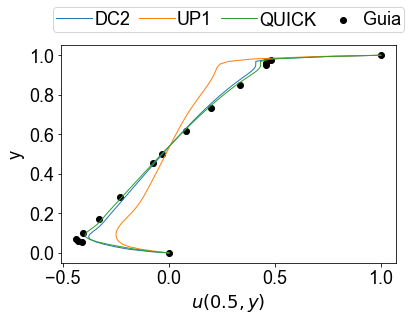

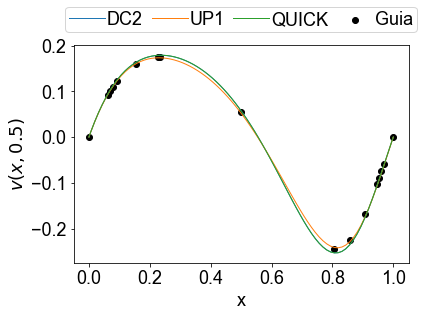

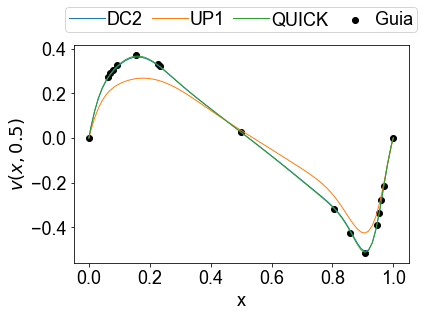

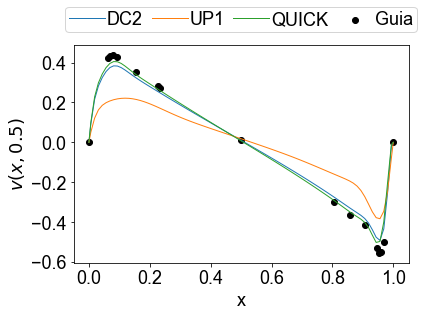

In [405]:


termino_advectivo_array = np.array(['D', 'U', 'Q'])
Re_array = np.array([100,1000,5000])
vel_array = np.array(['u', 'v']) #1: u, 2: v


#Grafico ambas velocidades:
for k in range(len(vel_array)):
    #Grafico para todo Re:
    for Re in Re_array:
        #Grafico solo n1 = 80
        n1 = 80

        #Grafico cada termino advectivo
        for termino_advectivo in termino_advectivo_array:
            #Cargo datos
            if termino_advectivo == 'D':
                inciso = 'b'
            else:
                inciso = 'c'

            archivo_path = 'datos/'+inciso+ '_'+termino_advectivo+ '_'+str(n1)+ '_'+str(Re)+ '_velocentral.csv'
            datos = genfromtxt(archivo_path, delimiter=' ')

            #Agrego las condiciones de borde que no forman parte de los datos guardados
            if vel_array[k] == 'u':
                var_x = datos[:,k+1]
                var_y = datos[:,0]
                guia_x = guia_dicc[vel_array[k]][Re][1]
                guia_y = guia_dicc[vel_array[k]][Re][0]


                var_x = np.append([0.0],var_x)
                var_x = np.append(var_x, [1.0])

                var_y = np.append([0.0],var_y)
                var_y = np.append(var_y, [1.0])
                
            else:
                var_x = datos[:,0]
                var_y = datos[:,k+1]

                guia_x = guia_dicc[vel_array[k]][Re][0]
                guia_y = guia_dicc[vel_array[k]][Re][1]
                
                
                var_x = np.append([0.0],var_x)
                var_x = np.append(var_x, [1.0])

                var_y = np.append([0.0],var_y)
                var_y = np.append(var_y, [0.0])

            #Armo las labels:
            if termino_advectivo == 'D':
                label_ = 'DC2'
            elif termino_advectivo == 'U':
                label_ = 'UP1'
            else:
                label_ = 'QUICK'

            plt.plot(var_x, var_y, label =  label_, linewidth = 1)

        plt.scatter(guia_x,guia_y, label = 'Guia', linewidth = 1, color = 'black')

        #plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
        plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2), handletextpad=0.1, borderpad = 0.2, columnspacing=0.5)
        if vel_array[k] == 'u':
            plt.xlabel('$u(0.5,y)$')
            plt.ylabel('y')
        else:
            plt.ylabel('$v(x,0.5)$')
            plt.xlabel('x')

        #Guardo la figura
        plt.savefig('terminos_advs_' + vel_array[k]+'_'+str(Re)+'.pdf', format='pdf',bbox_inches = "tight")
        plt.show()

### Inciso d
Calculo el orden de convergencia espacial de UP1 en el cálculo de las velocidades en 2 puntos distintos.

In [406]:
#Cargo datos


datos_erroru_1 = genfromtxt("datos/d_error_uparticular_Re1.csv",delimiter = ',')
datos_errorv_1 = genfromtxt("datos/d_error_vparticular_Re1.csv",delimiter = ',')

# datos_erroru_1000 = genfromtxt("datos/d_error_uparticular_Re1000.csv",delimiter = ',')
# datos_errorv_1000 = genfromtxt("datos/d_error_vparticular_Re1000.csv",delimiter = ',')


# datos_u_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
# datos_v_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
# datos_u_UP1 = genfromtxt('datos/d_u_UP1.csv', delimiter=',')
# datos_v_UP1 = genfromtxt('datos/d_v_UP1.csv', delimiter=',')

In [410]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

Orden de convergencia:  2.5279722490866563 +/- 0.25890392418605823
Orden de convergencia:  2.88403428611868 +/- 0.4040887289633906


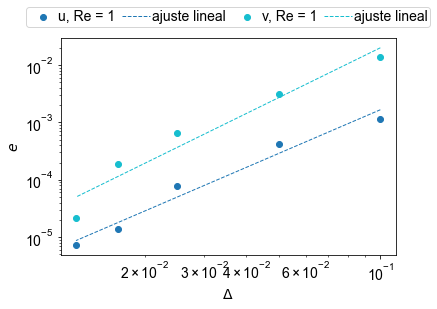

In [411]:
#Calculo los errores
# errores = errores_advectivo(datos_u_UP1, datos_v_UP1, datos_u_solucion, datos_v_solucion)

#Grafico los errores vs n1, una curva para cada Re y los ajustes lineales
Re_array = np.array([1,1000])
n1_array = np.array([10,20,40,60,80])
Delta_array = np.zeros(len(n1_array))
for i in range(len(n1_array)):
    Delta_array[i] = 1/n1_array[i]

plt.scatter(Delta_array, datos_erroru_1, label='u, Re = 1', color = "tab:blue")
datos = datos_erroru_1
limits = [0,len(datos[:])]
x, y = Delta_array, datos[limits[0]:limits[1]]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:blue", linestyle = "dashed")

plt.scatter(Delta_array, datos_errorv_1, label='v, Re = 1', color = "tab:cyan")
datos = datos_errorv_1
limits = [0,len(datos[:])]
x, y = Delta_array, datos[limits[0]:limits[1]]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:cyan", linestyle = "dashed")



# plt.plot(Delta_array, datos_erroru_1, label='u,Re = 1000', color = "tab:red")
# datos = datos_erroru_1
# limits = [0,len(datos[:])]
# x, y = Delta_array, datos[limits[0]:limits[1]]
# coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
# m, b = coefs[0], coefs[1]
# print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
# plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:red", linestyle = "dashed")

# plt.plot(Delta_array, datos_errorv_1, label='v,Re = 1000', color = "orange")
# datos = datos_errorv_1
# limits = [0,len(datos[:])]
# x, y = Delta_array, datos[limits[0]:limits[1]]
# coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
# m, b = coefs[0], coefs[1]
# print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
# plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:orange", linestyle = "dashed")





#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2), handletextpad=0.1, borderpad = 0.2, columnspacing=0.5)
#plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$\Delta$')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")


#Guardo el gráfico
plt.savefig('error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")

In [408]:
# plt.plot(Delta_array, datos_errorv_1, label='v, Re = 1')
# plt.plot(Delta_array, datos_errorv_1000, label='v,Re = 1000')

# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
# plt.xlabel('$\Delta$')
# plt.ylabel('$e$')

# plt.xscale("log")

# plt.savefig('d_error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")

### Inciso e

No va a haber gráfico. Voy a tener que ejecutar el código e ir copiando los resultados directamente en el .tex

### Inciso f

Ídem al anterior

### Inciso g

Grafico la evolución temporal de u(0.5,0.5) y v(0.5,0.5) para distintos lsimpler y distintos métodos de evolución temporal

In [409]:
#Importo datos

datos_1E =  genfromtxt("datos/evolucion_g_nsimpler1_metodotemporalE.csv", delimiter=',')
datos_1C =  genfromtxt("datos/evolucion_g_nsimpler1_metodotemporalC.csv", delimiter=',')
datos_3E =  genfromtxt("datos/evolucion_g_nsimpler3_metodotemporalE.csv", delimiter=',')
datos_3C =  genfromtxt("datos/evolucion_g_nsimpler3_metodotemporalC.csv", delimiter=',')


FileNotFoundError: datos/evolucion_g_nsimpler1_metodotemporalE.csv not found.

In [ ]:
#Grafico la evolución para distintos nsimpler y metodos de evolución temporal
#1 gráfico para u y otro para v


#tiempo: datos_1E[:,0]
# datos_1E[:,2]
# datos_1E[:,3]




